<center>
<b>
<font size=6>
Abstract Cloud:<br>
</font>
</b>

<font size=4>
Search PubMed for abstracts with a given author name and make a wordcloud from abstracts' text
</font>

</center>

In [1]:
# install packages (if necessary)
list_of_packages <- c(
  "RISmed",
  "tm",
  "SnowballC",
  "wordcloud2",
  "webshot",
  "htmlwidgets",
  "IRdisplay"
)

new_packages <- list_of_packages[
  !(list_of_packages %in% installed.packages()[, "Package"])
]

if (length(new_packages)) install.packages(new_packages)

webshot::install_phantomjs()
Sys.setenv(LANG = "en")

It seems that the version of `phantomjs` installed is greater than or equal to the requested version.To install the requested version or downgrade to another version, use `force = TRUE`.



In [2]:
# pubmed search
library(RISmed)

# text mining
library(tm)
library(SnowballC)

# wordcloud generation
library(wordcloud2)

# figure save and display
library(webshot)
library(htmlwidgets)
library(IRdisplay)

# Code put together by Murat Bilgel from:
# http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know
# https://cran.r-project.org/web/packages/wordcloud2/vignettes/wordcloud.html
# https://www.r-graph-gallery.com/196-the-wordcloud2-library/

Loading required package: NLP



In [3]:
# PubMed query
my_query <- "Murat Bilgel[AU]"

In [4]:
# get pubmed data
search_query <- EUtilsSummary(my_query)
records <- EUtilsGet(search_query)
pubmed_data <- data.frame(
  "Title" = ArticleTitle(records),
  "Abstract" = AbstractText(records)
)
# take a look at the first two results
head(pubmed_data, 2)

,Title,Abstract
,<chr>,<chr>
1,Probabilistic estimation for across-batch compatibility enhancement for amyloid PET.,"It is necessary to accurately account for systematic differences due to variability in scanners, radiotracers, and acquisition protocols in multisite studies combining amyloid imaging<U+00A0>data. We propose Probabilistic Estimation for Across-batch Compatibility Enhancement (PEACE), a fully Bayesian multimodal extension of the widely used ComBat harmonization model, and we apply it to harmonize regional amyloid positron emission tomography data from two<U+00A0>scanners. Simulations show that PEACE recovers true harmonized values better than ComBat, even for unimodal data. PEACE harmonization of multiscanner regional amyloid imaging data yields results that agree better with longitudinal data compared to ComBat, without removing the known biological effects of age or apolipoprotein E genotype. PEACE outperforms ComBat in both unimodal and bimodal contexts, is applicable to multisite amyloid imaging data, and holds promise for the harmonization of other neuroimaging data over<U+00A0>ComBat. We introduce PEACE, a fully Bayesian multimodal extension of ComBat harmonization.Simulations show that PEACE recovers true harmonized values better than ComBat.PEACE accurately harmonizes multiscanner regional amyloid imaging data."
2,Leveraging longitudinal diffusion MRI data to quantify differences in white matter microstructural decline in normal and abnormal aging.,"It is unclear how rates of white matter microstructural decline differ between normal aging and abnormal aging. Diffusion MRI data from several well-established longitudinal cohorts of aging [Alzheimer's Neuroimaging Initiative (ADNI), Baltimore Longitudinal Study of Aging (BLSA), Vanderbilt Memory & Aging Project (VMAP)] was free-water corrected and harmonized. This dataset included 1,723 participants (age at baseline: 72.8<U+00B1>8.87 years, 49.5% male) and 4,605 imaging sessions (follow-up time: 2.97<U+00B1>2.09 years, follow-up range: 1-13 years, mean number of visits: 4.42<U+00B1>1.98). Differences in white matter microstructural decline in normal and abnormal agers was assessed. While we found global decline in white matter in normal/abnormal aging, we found that several white matter tracts (e.g., cingulum bundle) were vulnerable to abnormal aging. There is a prevalent role of white matter microstructural decline in aging, and future large-scale studies in this area may further refine our understanding of the underlying neurodegenerative processes. Longitudinal data was free-water corrected and harmonizedGlobal effects of white matter decline were seen in normal and abnormal agingThe free-water metric was most vulnerable to abnormal agingCingulum free-water was the most vulnerable to abnormal aging."


In [5]:
# get abstract body only
docs <- VCorpus(VectorSource(pubmed_data$Abstract))

In [6]:
# take a look at the results
lapply(docs, inspect)

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1216

It is necessary to accurately account for systematic differences due to variability in scanners, radiotracers, and acquisition protocols in multisite studies combining amyloid imaging<U+00A0>data. We propose Probabilistic Estimation for Across-batch Compatibility Enhancement (PEACE), a fully Bayesian multimodal extension of the widely used ComBat harmonization model, and we apply it to harmonize regional amyloid positron emission tomography data from two<U+00A0>scanners. Simulations show that PEACE recovers true harmonized values better than ComBat, even for unimodal data. PEACE harmonization of multiscanner regional amyloid imaging data yields results that agree better with longitudinal data compared to ComBat, without removing the known biological effects of age or apolipoprotein E genotype. PEACE outperforms ComBat in both unimodal and bimodal contexts, is applicable to multisite amyloid imaging data, and holds promise for th

$`1`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1216

$`2`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1305

$`3`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1946

$`4`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1642

$`5`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1135

$`6`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1047

$`7`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1107

$`8`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 2969

$`9`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 2672

$`10`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 2647

$`11`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 2886

$`12`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1971

$`13`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 2147

$`14`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1483

$`15`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1906

$`16`
<<PlainTextDocument>>
Metadata:  7
Content:

In [7]:
# get rid of unnecessary characters in text
to_space <- content_transformer(function(x, pattern) gsub(pattern, " ", x))
docs <- tm_map(docs, to_space, "/")
docs <- tm_map(docs, to_space, "@")
docs <- tm_map(docs, to_space, "\\|")

In [8]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords (is, are, was, at, some, ...)
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove additional words
docs <- tm_map(
  docs, removeWords,
  c(
    "abstract", "abstracttext", "objective", "purpose",
    "introduction", "background", "method", "methods", "material",
    "materials", "discussion", "conclusion", "conclusions",
    "reference", "references", "bibliography",
    "however", "can", "may"
  )
)
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)

In [9]:
# generate word frequency table
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m), decreasing = TRUE)
d <- data.frame(word = names(v), freq = v)
head(d, 20) # look at top 20 words

,word,freq
,<chr>,<dbl>
amyloid,amyloid,139
disease,disease,100
associated,associated,99
age,age,95
brain,brain,91
longitudinal,longitudinal,91
cognitive,cognitive,76
study,study,70
participants,participants,66


In [10]:
# plot wordcloud
mywordcloud <- wordcloud2(d, size = 1.0, color = "random-dark")

In [11]:
# due to lack of htmlwidget support in jupyter notebook, we cannot display directly
# first save wordcloud as an interactive HTML, then export as png.
saveWidget(mywordcloud, "mywordcloud.html", selfcontained = FALSE)

In [12]:
# a longer delay might be necessary to capture more words
webshot("mywordcloud.html","mywordcloud.png", delay=60,
        vwidth=1000, vheight=1000)

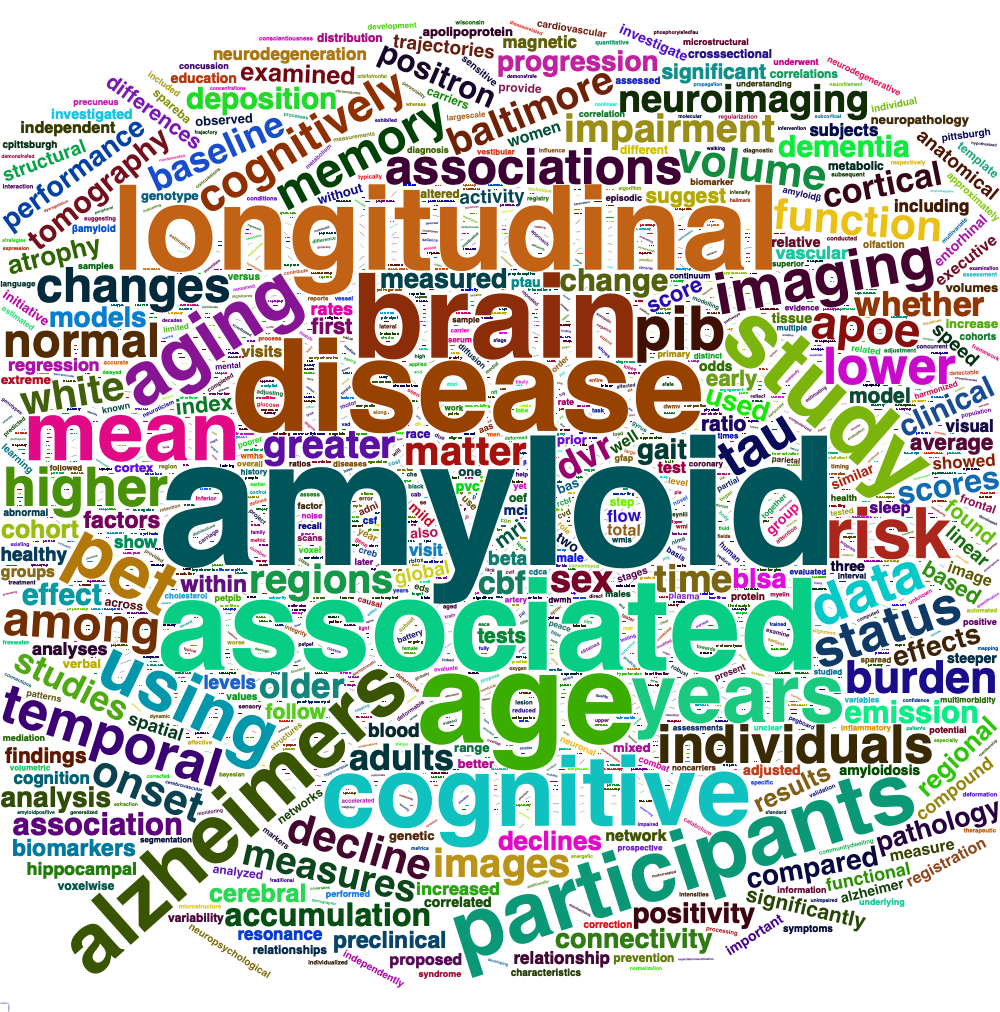

In [13]:
display_png(file = "mywordcloud.png")